# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


Read Dataset

In [2]:
df=pd.read_csv("C:\ds\Excel data\Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 Check Datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Check Null values from dataset

In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Delete unusefull column

In [6]:
df1=df.drop(['customer_id'],axis=1)
df1.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['country'].nunique()

3

In [8]:
df['gender'].nunique()

2

Lable Encoding 

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["country"]=le.fit_transform(df1["country"])
df1["gender"]=le.fit_transform(df1["gender"])

In [10]:
df1.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [12]:
y.head(2)

0    1
1    0
Name: churn, dtype: int64

OR

In [13]:
x=df1.drop(['churn'],axis=1)
y=df1.churn

In [14]:
x.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58


In [15]:
y.head(2)

0    1
1    0
Name: churn, dtype: int64

In [16]:
df_0=df1[df1['churn']==0]
df_0.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0


In [17]:
df_0.shape

(7963, 11)

In [18]:
df_1=df1[df1['churn']==1]
df_1.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.0,1,1,1,101348.88,1
2,502,0,0,42,8,159660.8,3,1,0,113931.57,1


In [19]:
df_1.shape

(2037, 11)

Data balancing technique:SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm=SMOTE(sampling_strategy='minority')

In [22]:
x_sm,y_sm=sm.fit_resample(x,y)

In [23]:
x_sm.shape

(15926, 10)

In [24]:
y_sm.shape

(15926,)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()
df2=scaler.fit_transform(x_sm)
df2

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.634     , 0.5       , 0.        , ..., 1.        , 0.        ,
        0.74659734],
       [0.668     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.36365559],
       [0.63      , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.66259056]])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2,y_sm,test_size=0.33,random_state=42)

In [28]:
x_train.shape

(10670, 10)

In [29]:
y_train.shape

(10670,)

In [30]:
x_test.shape

(5256, 10)

In [31]:
y_test.shape

(5256,)

Logistic Regression

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr.score(x_test,y_test)

0.772640791476408

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.772640791476408

In [37]:
cr=(classification_report(y_test,y_pred))
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2662
           1       0.76      0.79      0.77      2594

    accuracy                           0.77      5256
   macro avg       0.77      0.77      0.77      5256
weighted avg       0.77      0.77      0.77      5256



In [38]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2015,  647],
       [ 548, 2046]], dtype=int64)

SVC

In [39]:
from sklearn.svm import SVC
svc=SVC()

In [40]:
svc.fit(x_train,y_train)

SVC()

In [41]:
svc.score(x_test,y_test)

0.8274353120243532

In [42]:
y_pred1=svc.predict(x_test)
y_pred1

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred)

0.772640791476408

In [44]:
cr=(classification_report(y_test,y_pred1))
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2662
           1       0.84      0.81      0.82      2594

    accuracy                           0.83      5256
   macro avg       0.83      0.83      0.83      5256
weighted avg       0.83      0.83      0.83      5256



Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [46]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
dtc.score(x_test,y_test)

0.794710806697108

In [48]:
y_pred2=dtc.predict(x_test)
y_pred2

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred)

0.772640791476408

In [50]:
cr=(classification_report(y_test,y_pred2))
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2662
           1       0.78      0.81      0.80      2594

    accuracy                           0.79      5256
   macro avg       0.80      0.79      0.79      5256
weighted avg       0.80      0.79      0.79      5256



Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [52]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
rfc.score(x_test,y_test)

0.854261796042618

In [54]:
y_pred3=rfc.predict(x_test)
y_pred3

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred3)

0.854261796042618

In [56]:
cr=(classification_report(y_test,y_pred3))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2662
           1       0.85      0.85      0.85      2594

    accuracy                           0.85      5256
   macro avg       0.85      0.85      0.85      5256
weighted avg       0.85      0.85      0.85      5256



KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
y_pred4= knn.predict(x_test)
y_pred4

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred4)

0.8015601217656012

In [66]:
cr=(classification_report(y_test,y_pred4))
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2662
           1       0.79      0.82      0.80      2594

    accuracy                           0.80      5256
   macro avg       0.80      0.80      0.80      5256
weighted avg       0.80      0.80      0.80      5256



In [69]:
final_df = pd.DataFrame({'Models':['lr','svc','dtc','rfc','knn'],
                        'ACC':[accuracy_score(y_test,y_pred),
                              accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4)]})
final_df

,Models,ACC
0,lr,0.772641
1,svc,0.827435
2,dtc,0.794711
3,rfc,0.854262
4,knn,0.801560


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

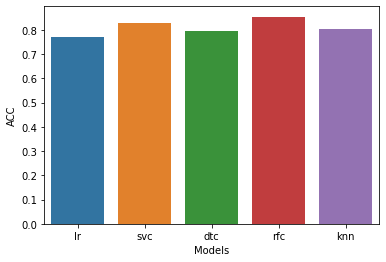

In [70]:
sns.barplot(final_df['Models'],final_df['ACC'])

In [81]:
rfc.predict([[619,42,2,0.0,0,0,0,101348.88,0,0]])

array([0], dtype=int64)